In [1]:
from IPython.display import Image

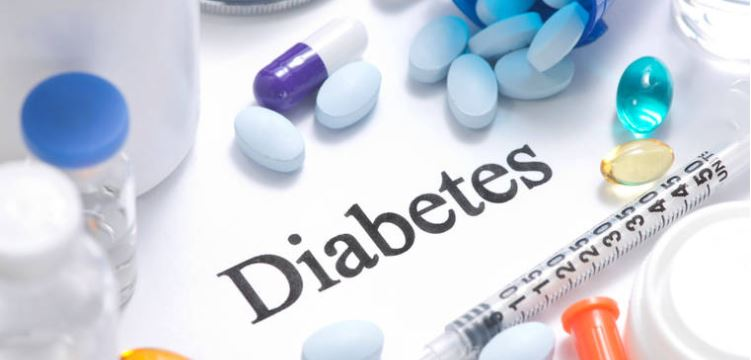

In [2]:
Image(filename='images/diabetics-image_.jpg', width=1400, height=289) 

#  Verwendung der prädiktiven Analyse zur Vorhersage der Diagnose des Diabetes

### Allgemeine Beschreibung:
Diabetes mellitus ist der Sammelbegriff für vielfältige Störungen des menschlichen Stoffwechsels, deren Hauptmerkmal die chronische Hyperglykämie (Überzuckerung) ist.

### Aufgaben Beschreibung: 
Der Datensatz soll analysiert werden, ob das Vorliegen einer Diagnose von Diabetes aus anderen Variablen vorhergesagt werden kann. 

### Verwendete Datensatz:
Datensatz / URL:

# Pipeline
### 1. Allgemeine Importieren
### 2. Feature Descriptions
### 3. Data Exploration
### 4. Feature Cleaning
### 5. Regularization / Feature Importance
### 6. Model Training
### 7. Hyperparameter Optimierung
### 8. ROC
### 9. Zusammenfassung

--------------------------------------------------------------------------------

# 1. Allgemeine Importieren

1 - Importieren von Python Pakete

2 - Datensatz laden.

In [3]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Regularisation
from sklearn.linear_model import LassoCV

# Cross-Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Train-Test Splitting
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Machine Learning Models for Classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors  import KNeighborsClassifier

# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV

# Performance metrics
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

%matplotlib inline

In [4]:
# Setting a name for the path
#############################
filename = "data/diabetes.csv"

In [5]:
# load the dataset
##################
df = pd.read_csv(filename)

In [6]:
# show the first 5 row of the dataset
#####################################
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 2. Feature Description

In [7]:
# creating a dataframe for the features & definitions
#####################################################
d = {"Features": ["Pregnancies", 
                  "Glucose", 
                  "BloodPressure",
                  "SkinThickness", 
                  "Insulin",
                  "BMI", 
                  "DiabetesPedigreeFunction",
                  "Age",
                  "Outcome"], 
     "Feature-Unit": ["in numbers", 
                         "mg/dL", 
                         "mmHg",
                         "mm",
                         "mu U/ml",
                         "weight in kg/(height in m)^2",
                         "-",
                         "in years",
                         "0 or 1"],
    "Feature-Definition": ["Number of Pregnancies", 
                           "Plasma Glucose Concentration", 
                           "Diastolic Blood Pressure",
                           "Triceps Skin Fold Thickness", 
                           "2-Hour Serum Insulin",
                           "Body Mass Index", 
                           "Likelihood of diabetes based on family history",
                           "Age",
                           "0 means no diabetes, 1 means diabetes"]}
feature_df = pd.DataFrame(data = d)
feature_df

,Features,Feature-Unit,Feature-Definition
0,Pregnancies,in numbers,Number of Pregnancies
1,Glucose,mg/dL,Plasma Glucose Concentration
2,BloodPressure,mmHg,Diastolic Blood Pressure
3,SkinThickness,mm,Triceps Skin Fold Thickness
4,Insulin,mu U/ml,2-Hour Serum Insulin
5,BMI,weight in kg/(height in m)^2,Body Mass Index
6,DiabetesPedigreeFunction,-,Likelihood of diabetes based on family history
7,Age,in years,Age
8,Outcome,0 or 1,"0 means no diabetes, 1 means diabetes"


# 3. Data Exploration

In [8]:
print("Dataset has" ,df.shape[0], "samples and", df.shape[1], "features.")

Dataset has 768 samples and 9 features.


In [9]:
# Check Datatypes
########################
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


 - Datentyp Konvertierung nicht nötig.

In [10]:
# Check target value 
###################
df.Outcome.unique()

array([1, 0], dtype=int64)

 - Outcome has just numerical values 0 and 1, which means binary classification. No need for encoding.

In [11]:
# Überprüfung von Target
#########################
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [12]:
# Basic statistische Analyse
###############################
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


 - "Glucose, BloodPressure, SkinThickness, Insulin, BMI" shows min-values of 0 !

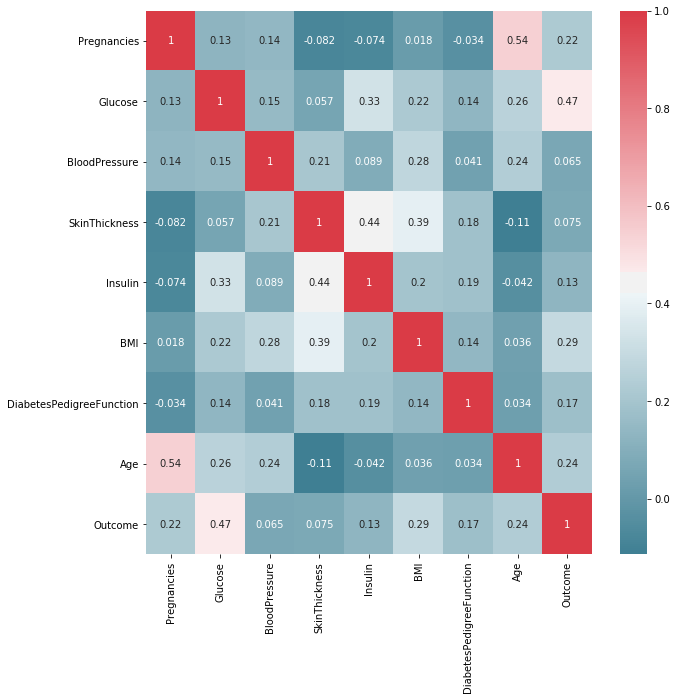

In [13]:
# Showing the correlation between the features using by heatmap
###############################################################
plt.figure(figsize=(10,10))
g=sns.heatmap(df.corr(), annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True,))
plt.show()

In [14]:
# Überprüfung der Korrelation von Variablen mit Korrelations-Matrix
###################################################################
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


 - Vom Correlationheatmap und Correlationsmatrix sind zu erkennen, dass die Input Parameters (Features) nicht stark korrelieren. Daher können alle Parameter für die Analyse behalten werden.

#### Korrelierte variablen:
 1. Insulin und Skinthickness
 2. Age und Pregnancies
 3. Glucose und Outcome

#### Nicht korrelierte variablen:
 1. DiabetesPedigreeFunction und Bloodpressure
 2. DiabetesPedigreeFunction und Age
 3. Age und BMI

In [15]:
cols = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

In [16]:
#deneme_df = pd.DataFrame(X_train, columns=cols)

In [17]:
from pandas.plotting import scatter_matrix

In [18]:
#scatter_matrix(deneme_df, c=y_train,figsize=(10,10), marker='o', hist_kwds={'bins':20}, s=80, alpha=0.8)

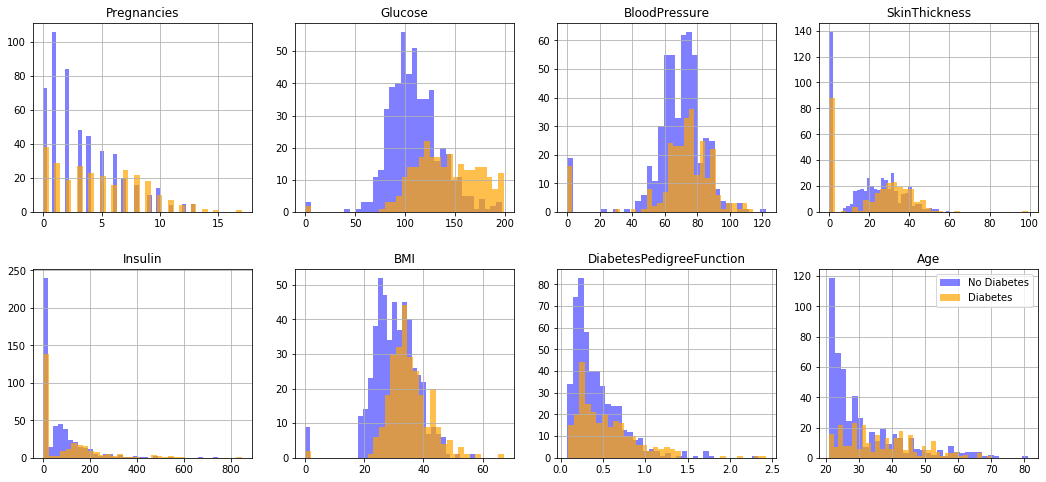

In [19]:
# Feature-Target analysis
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,8) )
row, col = 0, 0
for i, feature in enumerate(features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    

    df[df.Outcome==0][feature].hist(bins=35, color='blue', alpha=0.5, ax=ax[row, col]).set_title(feature)
    df[df.Outcome==1][feature].hist(bins=35, color='orange', alpha=0.7, ax=ax[row, col])
    
plt.legend(['No Diabetes', 'Diabetes'])
fig.subplots_adjust(hspace=0.3)

plt.show()

Die Verteilung der Diabetesfälle ähnelt insgesamt der Verteilung der Nicht-Diabetes. Kein einziger Parameter kann den Unterschied zwischen Diabetes und Nicht-Diabetes erklären.

In [20]:
# Outliers Detection mit Boxplot Visualisierung
##############################################
columns = ['Glucose', 'Age', 'BloodPressure', 'Insulin','BMI','SkinThickness' ,'Pregnancies',  'DiabetesPedigreeFunction']
n_cols = 2
n_rows = 4
idx = 0

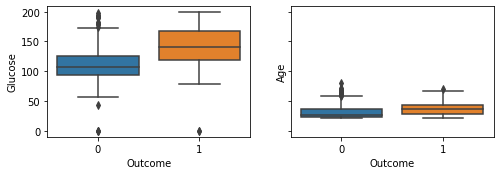

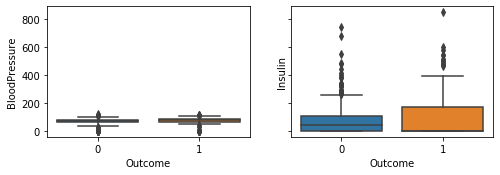

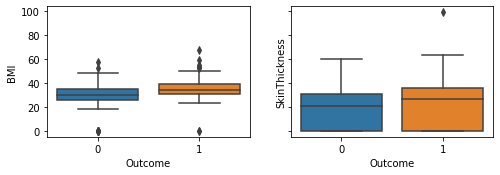

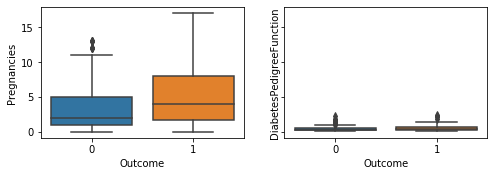

In [21]:
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1, ncols=n_cols, sharey=True, figsize=(8, 2.4))
    for j in range(n_cols):
        sns.boxplot(x = df.Outcome, y=df[columns[idx]], ax=ax[j]) 
        idx += 1
        if idx >= 8:
            break

In [22]:
# Prüfung nach NaN Values
#########################
df.isnull().values.any()

False

In [23]:
# Display missing values -> Zero Values
#######################################
print("     Features           Null Values")
#print("\nColumn Name           # of Null Values\n")
print((df[:] == 0).sum())

     Features           Null Values
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


Null Werte achten ! Zuerst wird die Distribution veranschaulicht. 

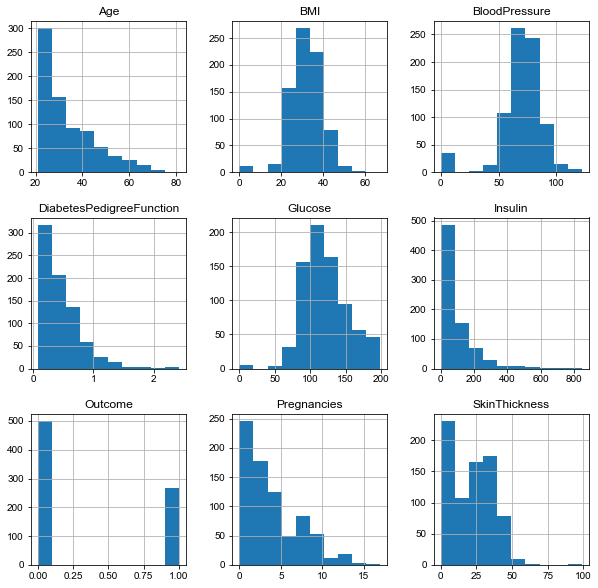

In [24]:
fig = df.hist(figsize = (10,10))
plt.style.use('seaborn-whitegrid')

 - Glucose und Bloodpressure ----> normal verteilt ----> Mittelwerte ersetzen.

 - SkinThickness, Insulin und BMI ----> Rechtsschief verteilt ----> Median ersetzen.

In [25]:
(((df["Glucose"] == 0).sum()) / len(df))

0.006510416666666667

In [26]:
(((df["BloodPressure"] == 0).sum()) / len(df))

0.045572916666666664

In [27]:
(((df["SkinThickness"] == 0).sum()) / len(df))

0.2955729166666667

In [28]:
(((df["Insulin"] == 0).sum()) / len(df))

0.4869791666666667

In [29]:
(((df["BMI"] == 0).sum()) / len(df))

0.014322916666666666

Skin thickness und Insulin Werte haben zu viele Invalid Werte. Daher nicht droppen. durch median ersetzen.

# 4. Feature Cleaning
 1- Konvertieren Null Werte, die sich "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI" befinden, ins NAN
 
 2- Ersetzen NaN Values durch mean/median damit Null Werte auf mean/median keine Auswirkung haben.

In [30]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [31]:
df.Glucose.replace(0, np.nan, inplace=True)
df.BloodPressure.replace(0, np.nan, inplace=True)
df.SkinThickness.replace(0, np.nan, inplace=True)
df.Insulin.replace(0, np.nan, inplace=True)
df.BMI.replace(0, np.nan, inplace=True)

In [32]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [33]:
df.Glucose.replace(np.nan, df['Glucose'].median(), inplace=True)
df.BloodPressure.replace(np.nan, df['BloodPressure'].median(), inplace=True)
df.SkinThickness.replace(np.nan, df['SkinThickness'].median(), inplace=True)
df.Insulin.replace(np.nan, df['Insulin'].median(), inplace=True)
df.BMI.replace(np.nan, df['BMI'].median(), inplace=True)

In [34]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,125.0,32.3,0.232,54,1


### Abhängige und unabhängige Variablen definieren:

In [35]:
X = df.drop(axis=1, labels="Outcome")

In [36]:
print("Unabhängige Variable Dimensionen: {} ".format(X.shape))

Unabhängige Variable Dimensionen: (768, 8) 


In [37]:
y = df["Outcome"]

In [38]:
print("Abhängige Variable / Target Dimension: {} ".format(y.shape))

Abhängige Variable / Target Dimension: (768,) 


In [39]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X.shape, y.shape

((768, 8), (768,))

### Skalierung von Features für Regulariserung

In [40]:
std.fit(X.values)
X_scaled = std.transform(X.values)

In [41]:
X_scaled

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.29912651,
        -0.47378505, -0.87137393]])

### Definieren von Regularization Strength(Lambda) durch LassoCV

In [42]:
alphavec = 10**np.linspace(-3,3,200)   
lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_scaled, y)

print('LASSO best alpha: ', lasso_model.alpha_ )

LASSO best alpha:  0.008603464416684501


[('Glucose', 0.1880413802244648), ('BMI', 0.08931918266428746), ('Pregnancies', 0.06311584122142201), ('DiabetesPedigreeFunction', 0.036276542515315036), ('Age', 0.016956407714825757), ('BloodPressure', -0.0), ('SkinThickness', 0.0), ('Insulin', -0.0)]


Text(0.5, 1.0, ' Übersicht durch LassoCV')

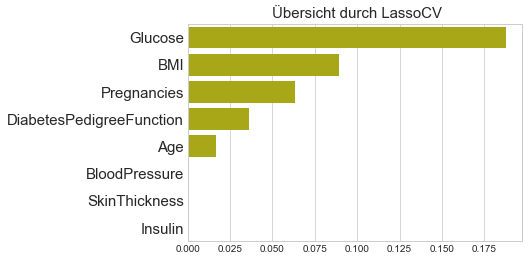

In [43]:
zipped = list(zip(X.columns, lasso_model.coef_)) 
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
print(zipped)
a,b = zip(*zipped)
sns.barplot(y=list(a), x=list(b), color='y')

plt.yticks(size=15)
plt.title(' Übersicht durch LassoCV', size=15)

# 6. Machine Learning Models

Machine Learning Models
 - Logistic Regression
 - K Neighbors Classifier
 - Decision Tree
 - Random Forest Classifier
 - Support Vector Machine

### Train-Split

In [44]:
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)

In [45]:
training_variable = (1.0 * len(X_train)) / (1.0 * len(df))
test_variable = (1.0 * len(X_test)) / (1.0 * len(df))
print("Training data: {0:0.2f}% ".format(training_variable * 100))
print("Test data: {0:0.2f}% ".format(test_variable * 100))

Training data: 79.95% 
Test data: 20.05% 


In [46]:
print("X_train", X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (614, 8)
y_train (614,)
X_test (154, 8)
y_test (154,)


In [47]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler(feature_range = (0,1))
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

### Accuracy score on training and test data

In [48]:
lr = LogisticRegression(max_iter=1000).fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svc = SVC().fit(X_train, y_train)

print("Logistic-Regression score on training data: {:.3f}".format(lr.score(X_train, y_train)))
print("Logistic-Regression score on test data: {:.3f}".format(lr.score(X_test, y_test)))

print("KNN score on training data: {:.3f}".format(knn.score(X_train, y_train)))
print("KNN score on test data: {:.3f}".format(knn.score(X_test, y_test)))

print("Decision Tree score on training data: {:.3f}".format(dt.score(X_train, y_train)))
print("Decision Tree score on test data: {:.3f}".format(dt.score(X_test, y_test)))

print("Random Forest score on training data: {:.3f}".format(rf.score(X_train, y_train)))
print("Random Forest  score on test data: {:.3f}".format(rf.score(X_test, y_test)))

print("Support Vector Classifier score on training data: {:.3f}".format(svc.score(X_train, y_train)))
print("Support Vector Classifier score on test data: {:.3f}".format(svc.score(X_test, y_test)))

Logistic-Regression score on training data: 0.765
Logistic-Regression score on test data: 0.812
KNN score on training data: 0.798
KNN score on test data: 0.766
Decision Tree score on training data: 1.000
Decision Tree score on test data: 0.721
Random Forest score on training data: 1.000
Random Forest  score on test data: 0.799
Support Vector Classifier score on training data: 0.759
Support Vector Classifier score on test data: 0.792


- Logistic Regression and SVM models have better accuracy on the training data than test data, which means the models can generalize to new data.
- The accuracy of models "Decision Tree" and "Random Forrest" on the training data is 100%, which means the models are not generalizing well to new data. (Overfitting)
- KNN 


 1) Cross Validation should be applied to avoid overfitting. 
 
 2) HP-Tuning might be help to improve the accuracy on the models.

### Feature importance in Decision Tree 

Text(0.5, 1.0, 'Overview of feature importance in Decision Tree')

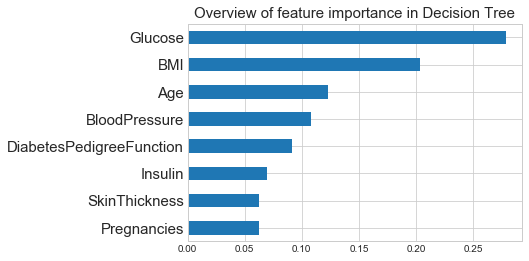

In [49]:
dtc = DecisionTreeClassifier(random_state=0)

dtc_model = dtc.fit(X_train, y_train)

(pd.Series(dtc_model.feature_importances_, index=X_train.columns)
    .nlargest(10)   
    .plot(kind='barh', figsize=[6,4])
    .invert_yaxis()) 

plt.yticks(size=15)
plt.title('Overview of feature importance in Decision Tree', size=15)

### Feature importance in Random Forest

Text(0.5, 1.0, 'Overview of feature importance in Random Forest')

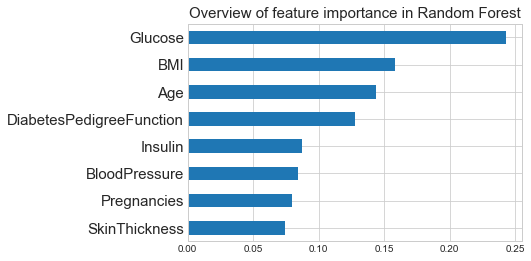

In [50]:
rfc = RandomForestClassifier(random_state=0, n_estimators=100)

rfc_model = rfc.fit(X_train, y_train)

(pd.Series(rfc_model.feature_importances_, index=X_train.columns)
    .nlargest(10)   
    .plot(kind='barh', figsize=[6,4])
    .invert_yaxis()) 

plt.yticks(size=15)
plt.title('Overview of feature importance in Random Forest', size=15)

 - Random Forest and Decision Tree gives a similar importance to the feature "Glucose". And the second informative feature is "BMI".

### Basic Model Training (not using by Cross-Validation / HP-Optimization)

In [51]:
# Define a function for report
def basic_model_report(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    rocauc = roc_auc_score(y_test, y_pred)
    logloss = log_loss(y_test, y_pred)
    
    df_model_report = pd.DataFrame({'model' : [name],
                                    'accuracy': [accuracy],
                                    'precision' : [precision],
                                    'recall' : [recall],
                                    'f1score' : [f1score],
                                    'rocauc': [rocauc],
                                    'logloss': [logloss] })
    return df_model_report

# Models
lr = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()

# Concat all models 
df_models_basic = pd.concat([basic_model_report(lr, X_train, X_test, y_train, y_test, 'LogisticRegression'),
                       basic_model_report(knn, X_train, X_test, y_train, y_test, 'KNN'),
                       basic_model_report(dt, X_train, X_test, y_train, y_test, 'DecisionTree'),
                       basic_model_report(rf, X_train, X_test, y_train, y_test, 'RandomForest'),
                       basic_model_report(svc, X_train, X_test, y_train, y_test, 'SVC'),
                       ], axis=0).reset_index()

df_models_basic = df_models_basic.drop('index', axis=1)
df_models_basic

,model,accuracy,precision,recall,f1score,rocauc,logloss
0,LogisticRegression,0.811688,0.736842,0.595745,0.658824,0.751143,6.504107
1,KNN,0.766234,0.622222,0.595745,0.608696,0.718433,8.074088
2,DecisionTree,0.740260,0.571429,0.595745,0.583333,0.699741,8.971220
3,RandomForest,0.798701,0.681818,0.638298,0.659341,0.753728,6.952684
4,SVC,0.792208,0.727273,0.510638,0.600000,0.713263,7.176935


### Model Training (using by StratifiedKFold CV)

In [52]:
# Using by StratifiedKFold because of inbalanced Data / fold=5
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Calculating mean values of k-folds
def kf_cross_report(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    accuracy = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy'))
    precision = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='precision'))
    recall = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='recall' ))
    f1score = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='f1'))
    rocauc = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc'))
    
    y_prediction = model.predict(X_test)
    logloss = log_loss(y_test,y_prediction)
    
    df_model_report = pd.DataFrame({'model' : [name],
                                    'accuracy': [accuracy],
                                    'precision' : [precision],
                                    'recall' : [recall],
                                    'f1score' : [f1score],
                                    'rocauc': [rocauc],
                                    'logloss': [logloss] })
    return df_model_report

# Models
lr = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()

# Concat all models with axis = 0
df_models_skf = pd.concat([kf_cross_report(lr, X_train, X_test, y_train, y_test, 'LogisticRegression'),
                       kf_cross_report(knn, X_train, X_test, y_train, y_test, 'KNN'),
                       kf_cross_report(dt, X_train, X_test, y_train, y_test, 'DecisionTree'),
                       kf_cross_report(rf, X_train, X_test, y_train, y_test, 'RandomForest'),
                       kf_cross_report(svc, X_train, X_test, y_train, y_test, 'SVC'),
                       ], axis=0).reset_index()
df_models_skf = df_models_skf.drop('index', axis=1)
df_models_skf

,model,accuracy,precision,recall,f1score,rocauc,logloss
0,LogisticRegression,0.755631,0.704115,0.561313,0.622540,0.823107,6.504107
1,KNN,0.700307,0.598611,0.520707,0.553106,0.744202,8.074088
2,DecisionTree,0.669332,0.558435,0.592828,0.557524,0.652998,9.195503
3,RandomForest,0.734386,0.686511,0.592828,0.613851,0.817438,6.728406
4,SVC,0.754005,0.749457,0.493636,0.588657,0.807039,7.176935


# 7. Hyperparameter Optimierung

 - Since the dataset is small, the Grid Search could be applied instead of Random Search.

### Grid Search - Logistic Regression

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
param_grid = {'C' : [0.01, 0.1, 1, 20, 100],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear'],
              'max_iter': [1000]}

In [55]:
grid_lr = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='roc_auc')

In [56]:
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 20, 100], 'max_iter': [1000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [57]:
print("Best Cross-Validation Score: {}".format(grid_lr.best_score_))
print("Best Parameters: ", grid_lr.best_params_)
print("Best Estimator: ", grid_lr.best_estimator_)

Best Cross-Validation Score: 0.8277613361790577
Best Parameters:  {'C': 20, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Best Estimator:  LogisticRegression(C=20, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [58]:
LR = grid_lr.best_estimator_
LR.fit(X_train, y_train)
y_pred_lr = LR.predict(X_test)
print('Testing metrics after grid search')
print('Accuracy', accuracy_score(y_test, y_pred_lr))
print('Precision', precision_score(y_test, y_pred_lr))
print('Recall', recall_score(y_test, y_pred_lr))
print('F1-Score', f1_score(y_test, y_pred_lr))
print('Roc-Auc', roc_auc_score(y_test, y_pred_lr))
print('Log-Los', log_loss(y_test, y_pred_lr))

Testing metrics after grid search
Accuracy 0.8116883116883117
Precision 0.7368421052631579
Recall 0.5957446808510638
F1-Score 0.6588235294117647
Roc-Auc 0.7511433684629151
Log-Los 6.5041072170565695


In [59]:
lr_model_tuned = basic_model_report(LR, X_train, X_test, y_train, y_test, 'LogisticRegression' )

In [60]:
lr_model_tuned

,model,accuracy,precision,recall,f1score,rocauc,logloss
0,LogisticRegression,0.811688,0.736842,0.595745,0.658824,0.751143,6.504107


### Grid Search - Decision Tree

In [61]:
#max_depth: default=2 birak kendi secsin
# min_samples_split =  tends to between 1-40  used to control over-fitting
# min samples leaf = 1 to 20

param_grid_dt = {'max_depth' : [1, 2, 4, 6],
              'min_samples_split' : [2, 5, 10, 20],
              'min_samples_leaf' : [1, 5, 10 ,20]}

In [62]:
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='accuracy')

In [63]:
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 4, 6],
                         '

In [64]:
print("Best Cross-Validation Score: {}".format(grid_dt.best_score_))
print("Best Parameters: ", grid_dt.best_params_)
print("Best Estimator: ", grid_dt.best_estimator_)

#print('Decision Tree accuracy score is: ')
#print('Training: {:.2f}%'.format(grid_dt.score(X_train, y_train))) 
#accuracy_dt      = grid_dt.score(X_test, y_test)
#print('Test set: {:.2f}%'.format(accuracy_dt))

Best Cross-Validation Score: 0.7296148207383713
Best Parameters:  {'max_depth': 4, 'min_samples_leaf': 20, 'min_samples_split': 5}
Best Estimator:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [65]:
DT = grid_dt.best_estimator_
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print('Testing metrics after grid search')
print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('F1-Score', f1_score(y_test, y_pred))
print('Roc-Auc', roc_auc_score(y_test, y_pred))
print('Log-Los', log_loss(y_test, y_pred))

Testing metrics after grid search
Accuracy 0.7792207792207793
Precision 0.6857142857142857
Recall 0.5106382978723404
F1-Score 0.5853658536585366
Roc-Auc 0.7039172797772917
Log-Los 7.625501253238282


In [66]:
dt_model_tuned = basic_model_report(DT, X_train, X_test, y_train, y_test, 'Decision Tree' )

In [67]:
dt_model_tuned

,model,accuracy,precision,recall,f1score,rocauc,logloss
0,Decision Tree,0.779221,0.685714,0.510638,0.585366,0.703917,7.625501


### Grid Search - KNeighborsClassifier

In [68]:
k_range = list(range(1,31))
leaf_size = [10,20,30,40,50]
weight_options = ["uniform", "distance"]

param_grid_knn = {'n_neighbors' : k_range,
                  'weights': weight_options,
                  'leaf_size': leaf_size }

In [69]:
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')

In [70]:
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [71]:
print("Best Cross-Validation Score: {}".format(grid_knn.best_score_))
print("Best Parameters: ", grid_knn.best_params_)
print("Best Estimator: ", grid_knn.best_estimator_)

print('KNN accuracy score is: ')
print('Training: {:.2f}%'.format(grid_knn.score(X_train, y_train))) 
accuracy_knn      = grid_knn.score(X_test, y_test)
print('Test set: {:.2f}%'.format(accuracy_knn))

Best Cross-Validation Score: 0.7378115420498467
Best Parameters:  {'leaf_size': 10, 'n_neighbors': 6, 'weights': 'uniform'}
Best Estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')
KNN accuracy score is: 
Training: 0.77%
Test set: 0.75%


In [72]:
KNN = grid_knn.best_estimator_
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
print('Testing metrics after grid search')
print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('F1-Score', f1_score(y_test, y_pred))
print('Roc-Auc', roc_auc_score(y_test, y_pred))
print('Log-Los', log_loss(y_test, y_pred))

Testing metrics after grid search
Accuracy 0.7532467532467533
Precision 0.6153846153846154
Recall 0.5106382978723404
F1-Score 0.558139534883721
Roc-Auc 0.6852256909922448
Log-Los 8.522633097195186


In [73]:
knn_model_tuned = basic_model_report(KNN, X_train, X_test, y_train, y_test, 'KNN' )

In [74]:
knn_model_tuned

,model,accuracy,precision,recall,f1score,rocauc,logloss
0,KNN,0.753247,0.615385,0.510638,0.55814,0.685226,8.522633


### Grid Search - Random Forest

In [75]:
n_estimators = [10, 30, 100, 300]
max_depth = [3, None]
min_samples_leaf = [1, 10, 25, 50]
criterion = ["gini", "entropy"]


param_grid_rf = {'n_estimators' : n_estimators,
                  'min_samples_leaf': min_samples_leaf,
                  'max_depth': max_depth,
                  'criterion': criterion}

In [76]:
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')

In [77]:
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [78]:
print("Best Cross-Validation Score: {}".format(grid_rf.best_score_))
print("Best Parameters: ", grid_rf.best_params_)
print("Best Estimator: ", grid_rf.best_estimator_)

Best Cross-Validation Score: 0.7703451952552313
Best Parameters:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 10, 'n_estimators': 10}
Best Estimator:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [79]:
RF = grid_rf.best_estimator_
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
print('Testing metrics after grid search')
print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('F1-Score', f1_score(y_test, y_pred))
print('Roc-Auc', roc_auc_score(y_test, y_pred))
print('Log-Los', log_loss(y_test, y_pred))

Testing metrics after grid search
Accuracy 0.8376623376623377
Precision 0.775
Recall 0.6595744680851063
F1-Score 0.7126436781609196
Roc-Auc 0.7877311592761981
Log-Los 5.60699094967298


In [80]:
rf_model_tuned = basic_model_report(RF, X_train, X_test, y_train, y_test, 'RF' )

In [81]:
rf_model_tuned

,model,accuracy,precision,recall,f1score,rocauc,logloss
0,RF,0.811688,0.736842,0.595745,0.658824,0.751143,6.504107


### Grid Search - Support Vector Classifier

In [82]:
C = [0.1, 1, 10, 100]
kernel = ['rbf', 'linear']
gamma = ['scale']

param_grid_svc = {'C' : C,
                  'kernel': kernel,
                  'gamma': gamma}

In [83]:
grid_svc = GridSearchCV(SVC(probability=True), param_grid_svc, cv=5, scoring='accuracy')

In [84]:
# It takes 7 min...
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale'],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [85]:
print("Best Cross-Validation Score: {}".format(grid_svc.best_score_))
print("Best Parameters: ", grid_svc.best_params_)
print("Best Estimator: ", grid_svc.best_estimator_)

print('SVC accuracy score is')
print('Training: {:.2f}%'.format(grid_svc.score(X_train, y_train))) 
accuracy      = grid_svc.score(X_test, y_test)
print('Test set: {:.2f}%'.format(accuracy))

Best Cross-Validation Score: 0.7622284419565506
Best Parameters:  {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Estimator:  SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
SVC accuracy score is
Training: 0.76%
Test set: 0.81%


In [86]:
SVC = grid_svc.best_estimator_
SVC.fit(X_train, y_train)
y_pred = SVC.predict(X_test)
print('Testing metrics after grid search')
print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('F1-Score', f1_score(y_test, y_pred))
print('Roc-Auc', roc_auc_score(y_test, y_pred))
print('Log-Los', log_loss(y_test, y_pred))

Testing metrics after grid search
Accuracy 0.8051948051948052
Precision 0.7297297297297297
Recall 0.574468085106383
F1-Score 0.6428571428571429
Roc-Auc 0.7405050705905747
Log-Los 6.728384985854692


In [87]:
svc_model_tuned = basic_model_report(SVC, X_train, X_test, y_train, y_test, 'SVC' )

In [88]:
svc_model_tuned

,model,accuracy,precision,recall,f1score,rocauc,logloss
0,SVC,0.805195,0.72973,0.574468,0.642857,0.740505,6.728385


In [89]:
df_tuned_models = pd.concat([lr_model_tuned, knn_model_tuned, dt_model_tuned, rf_model_tuned, svc_model_tuned], axis=0).reset_index() 

In [90]:
df_tuned_models.drop('index', axis=1, inplace=True)

In [91]:
df_tuned_models

,model,accuracy,precision,recall,f1score,rocauc,logloss
0,LogisticRegression,0.811688,0.736842,0.595745,0.658824,0.751143,6.504107
1,KNN,0.753247,0.615385,0.510638,0.558140,0.685226,8.522633
2,Decision Tree,0.779221,0.685714,0.510638,0.585366,0.703917,7.625501
3,RF,0.811688,0.736842,0.595745,0.658824,0.751143,6.504107
4,SVC,0.805195,0.729730,0.574468,0.642857,0.740505,6.728385


########################################

# 8. ROC (True positive rate / False positive rate)

true positive rate -> tpr

false positive rate -> fpr

In [92]:
y_pred_prob_lr = LR.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(y_test, y_pred_prob_lr)

In [93]:
y_pred_prob_KNN = KNN.predict_proba(X_test)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, y_pred_prob_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(y_test, y_pred_prob_KNN)

In [94]:
y_pred_prob_Tree = DT.predict_proba(X_test)[:,1]
fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(y_test, y_pred_prob_Tree)
roc_auc_Tree = auc(fpr_Tree, tpr_Tree)
precision_Tree, recall_Tree, th_Tree = precision_recall_curve(y_test, y_pred_prob_Tree)

In [95]:
y_pred_prob_SVMlinear = SVC.predict_proba(X_test)[:,1]
fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(y_test, y_pred_prob_SVMlinear)
roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(y_test, y_pred_prob_SVMlinear)

In [96]:
y_pred_prob_rf = RF.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(y_test, y_pred_prob_rf)

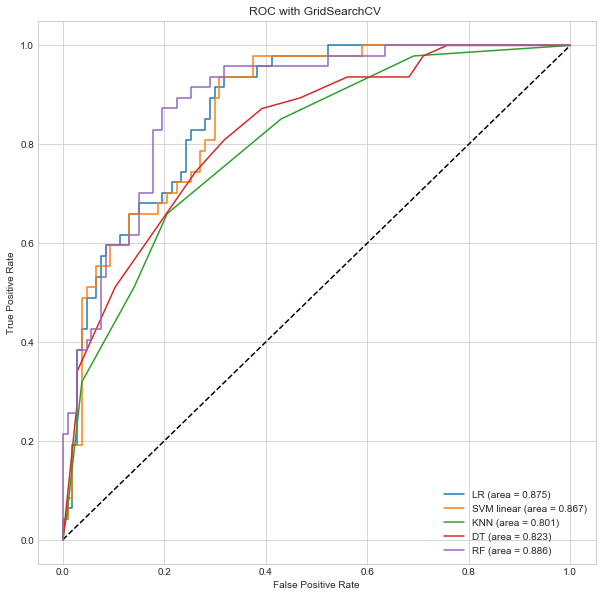

In [100]:
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR (area = %0.3f)' % roc_auc_lr)
#plt.plot(fpr_SVMrbf, tpr_SVMrbf, label='SVM rbf (area = %0.3f)' % roc_auc_SVMrbf)
plt.plot(fpr_SVMlinear, tpr_SVMlinear, label='SVM linear (area = %0.3f)' % roc_auc_SVMlinear)
plt.plot(fpr_KNN, tpr_KNN, label='KNN (area = %0.3f)' % roc_auc_KNN)
plt.plot(fpr_Tree, tpr_Tree, label='DT (area = %0.3f)' % roc_auc_Tree)
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC with GridSearchCV ')
plt.legend(loc='best')
plt.show()

In [103]:
y_pred_prob_lr = lr.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(y_test, y_pred_prob_lr)

y_pred_prob_KNN = knn.predict_proba(X_test)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, y_pred_prob_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(y_test, y_pred_prob_KNN)

y_pred_prob_Tree = dt.predict_proba(X_test)[:,1]
fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(y_test, y_pred_prob_Tree)
roc_auc_Tree = auc(fpr_Tree, tpr_Tree)
precision_Tree, recall_Tree, th_Tree = precision_recall_curve(y_test, y_pred_prob_Tree)

#y_pred_prob_SVMlinear = svc.predict_proba(X_test)[:,1]
#fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(y_test, y_pred_prob_SVMlinear)
#roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
#precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(y_test, y_pred_prob_SVMlinear)

y_pred_prob_rf = rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(y_test, y_pred_prob_rf)

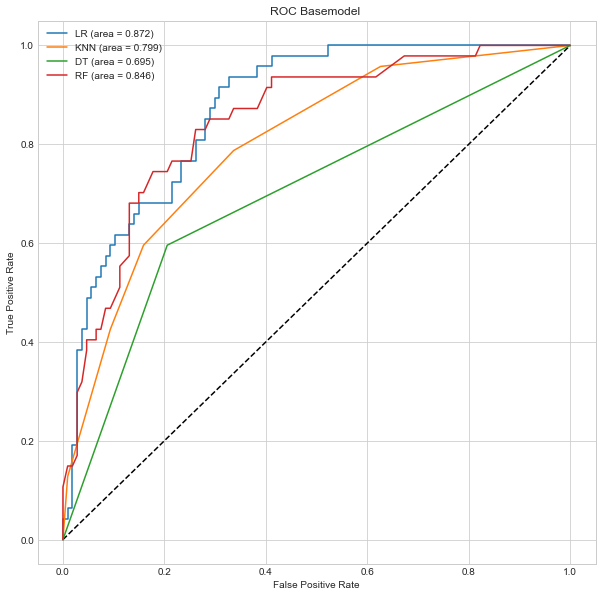

In [104]:
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR (area = %0.3f)' % roc_auc_lr)
#plt.plot(fpr_SVMrbf, tpr_SVMrbf, label='SVM rbf (area = %0.3f)' % roc_auc_SVMrbf)
#plt.plot(fpr_SVMlinear, tpr_SVMlinear, label='SVM linear (area = %0.3f)' % roc_auc_SVMlinear)
plt.plot(fpr_KNN, tpr_KNN, label='KNN (area = %0.3f)' % roc_auc_KNN)
plt.plot(fpr_Tree, tpr_Tree, label='DT (area = %0.3f)' % roc_auc_Tree)
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Basemodel ')
plt.legend(loc='best')
plt.show()

# 9. Conclusion

- Fälle ohne Diabetes werden genauer vorhergesagt als Fälle mit Diabetes.
- Basierend auf Random Forrest -> Glucose, BMI, Age, Diabetes und insulin sind Hauptursachen für Diabetes.
- Basierend auf Parameterkorrelation kann kein einzelner Parameter Diabetes vorhersagen.
- Based on ROC-Curves we can see the AUC score of models has been improved through HP-Optimization.